In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.shape

(865, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [32]:
# input data
x = df.drop(['Email No.', 'Prediction'], axis=1)

#output data
y = df['Prediction']

In [6]:
x.shape

(865, 3000)

In [8]:
set(x.dtypes)

{dtype('int64'), dtype('float64')}

<Axes: xlabel='Prediction', ylabel='count'>

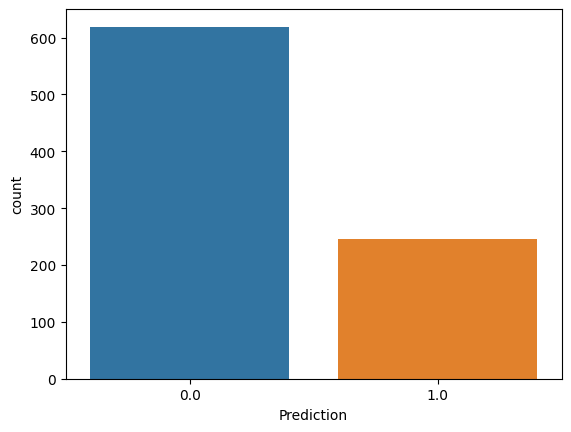

In [9]:
import seaborn as sns
sns.countplot(x = y)

In [12]:
y.value_counts()

0.0    619
1.0    245
Name: Prediction, dtype: int64

In [33]:
# Feature Scalaing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.12299465, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00757576, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24285714, 0.36363636, 0.59358289, ..., 0.        , 0.00877193,
        0.        ],
       [0.0047619 , 0.04545455, 0.03743316, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
# Cross-validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(x_test)

In [51]:
# Import the evaluation matrices
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

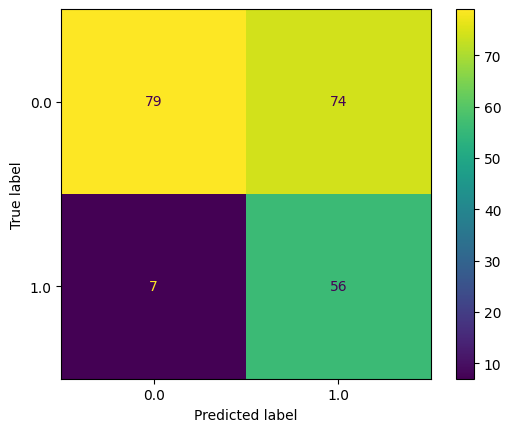

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [53]:
y_test.value_counts()

0.0    153
1.0     63
Name: Prediction, dtype: int64

In [54]:
accuracy_score(y_test, y_pred)

0.625

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.52      0.66       153
         1.0       0.43      0.89      0.58        63

    accuracy                           0.62       216
   macro avg       0.67      0.70      0.62       216
weighted avg       0.78      0.62      0.64       216



In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
error = []

for k in range(1, 41):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  error.append(np.mean(pred != y_test))

In [58]:
error

[0.26851851851851855,
 0.25462962962962965,
 0.3287037037037037,
 0.3333333333333333,
 0.375,
 0.37962962962962965,
 0.4305555555555556,
 0.4212962962962963,
 0.48148148148148145,
 0.4722222222222222,
 0.5138888888888888,
 0.5138888888888888,
 0.5277777777777778,
 0.5138888888888888,
 0.5416666666666666,
 0.5185185185185185,
 0.5462962962962963,
 0.5231481481481481,
 0.5462962962962963,
 0.5370370370370371,
 0.5694444444444444,
 0.5092592592592593,
 0.5509259259259259,
 0.5138888888888888,
 0.5462962962962963,
 0.5185185185185185,
 0.5277777777777778,
 0.4722222222222222,
 0.5092592592592593,
 0.42592592592592593,
 0.4722222222222222,
 0.4305555555555556,
 0.46296296296296297,
 0.4074074074074074,
 0.44907407407407407,
 0.4027777777777778,
 0.42592592592592593,
 0.37037037037037035,
 0.4074074074074074,
 0.35648148148148145]

In [63]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
y_pred = knn.predict(x_test)

In [61]:
accuracy_score(y_test, y_pred)

0.7314814814814815

SVM Classifier

In [64]:
from sklearn.svm import SVC

In [65]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [66]:
accuracy_score(y_test, y_pred)

0.9629629629629629

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       153
         1.0       0.97      0.90      0.93        63

    accuracy                           0.96       216
   macro avg       0.96      0.95      0.95       216
weighted avg       0.96      0.96      0.96       216

